In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]
single_image.shape

(28, 28)

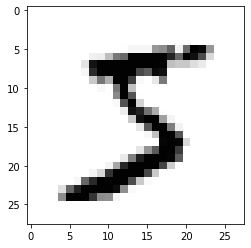

In [7]:
plt.imshow(single_image, cmap='Greys')

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train, num_classes=10)

### Processing X Data

We should normalize the X data

In [16]:
single_image.max(), single_image.min()

(255, 0)

In [17]:
x_train = x_train/255

In [18]:
x_test =x_test/255

In [19]:
scaled_image = x_train[0]

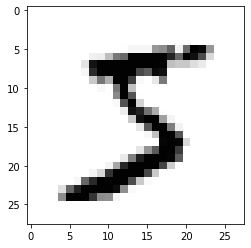

In [20]:
plt.imshow(scaled_image, cmap='Greys')

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
#batch_size, width, hight, colour channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
#batch_size, width, hight, colour channels
x_test = x_test.reshape(10000, 28, 28, 1)

# Training the Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [35]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),
                 input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

#Output Layer

model.add(Dense(10, activation='softmax'))
# keras.io/metrics - to check available maetrics

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [38]:
model.fit(x_train, y_cat_train, epochs=10,validation_data=(x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2905 - accuracy: 0.9128 - val_loss: 0.0608 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0471 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0387 - val_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0373 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0378 - val_accuracy: 0.9884


## EVALUATE THE MODEL

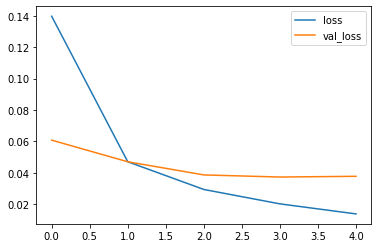

In [41]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

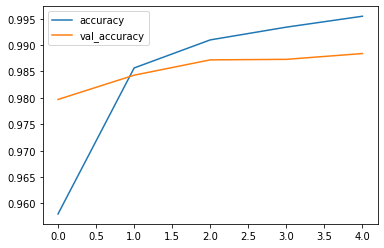

In [42]:
metrics[['accuracy', 'val_accuracy']].plot()

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
model.evaluate(x_test,y_cat_test, verbose=0)

[0.03780441731214523, 0.9883999824523926]

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [48]:
y_cat_test.shape

(10000, 10)

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [50]:
print(confusion_matrix(y_test, predictions))

[[ 975    1    1    0    0    0    2    0    0    1]
 [   1 1128    1    0    0    0    3    1    1    0]
 [   3    0 1022    1    1    0    0    2    3    0]
 [   0    0    2  999    0    7    0    0    2    0]
 [   1    0    0    0  967    0    6    0    3    5]
 [   2    0    1    5    0  882    2    0    0    0]
 [   3    1    0    1    1    2  949    0    1    0]
 [   1    1    9    1    0    0    0 1009    3    4]
 [   4    0    1    0    0    0    1    0  964    4]
 [   4    0    0    1    1    5    0    4    5  989]]


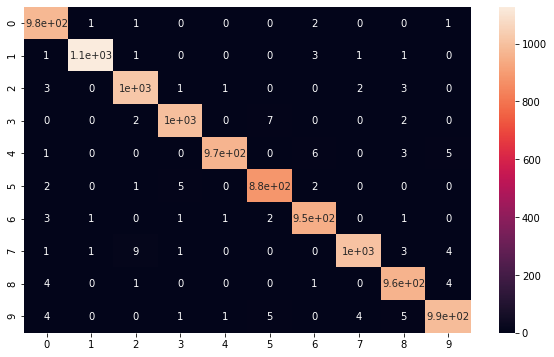

In [54]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [55]:
my_num = x_test[0]

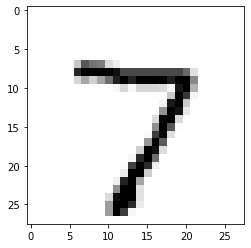

In [57]:
plt.imshow(my_num.reshape(28,28), cmap='Greys')

In [58]:
# num_image must have num_images, hight, width, color_channels shape
model.predict_classes(my_num.reshape(1, 28,28, 1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])